## Step - 01 
### Manual Calculation

In [26]:
import pandas as pd
df = pd.read_csv("Assignment - 04.csv")

In [27]:
df

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


In [28]:
x = df['Weight']
y = df['Price']

In [29]:
df.isnull().sum()

Weight    0
Price     0
dtype: int64

In [30]:
df.shape

(7, 2)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  7 non-null      int64
 1   Price   7 non-null      int64
dtypes: int64(2)
memory usage: 244.0 bytes


Text(0.5, 1.0, 'Vegitable Price Prediction')

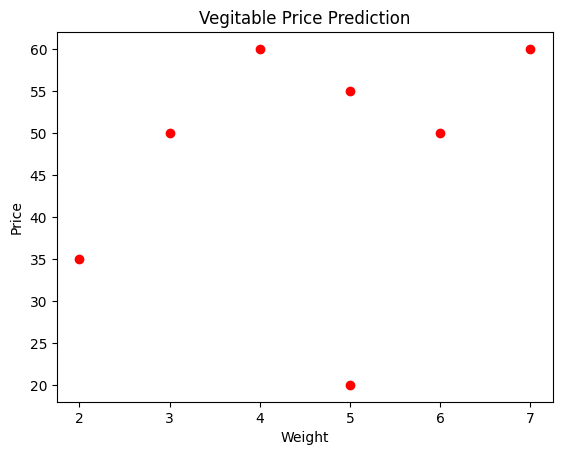

In [32]:
from matplotlib import pyplot as plt
plt.scatter(df['Weight'],df['Price'],color='red')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Vegitable Price Prediction')

### Using Numpy

In [33]:
import numpy as np
x_mean = np.mean(x)
y_mean = np.mean(y)

In [34]:
x_mean

4.571428571428571

In [35]:
y_mean

47.142857142857146

#### Equation for Slope and Intercept:

Slope, m = Σ((x - x̄) * (y - ȳ)) / Σ((x - x̄)^2) <br>
Intercept, c = ȳ - m * x̄

In [36]:
dev_x = x - x_mean
dev_y = y - y_mean

In [37]:
#Slope
M = np.sum(dev_x * dev_y) / np.sum(dev_x**2)
M

2.620967741935484

In [38]:
#Intercept 
C = np.mean(y) - M * np.mean(x)
C

35.16129032258065

In [39]:
# Lets Predict price for vegitable weight 6
Y = M * 6 + C
Y

50.88709677419355

## Using Sklearn

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
reg = LinearRegression()

In [42]:
reg.fit(df[['Weight']],df[['Price']])

LinearRegression()

In [43]:
reg.coef_

array([[2.62096774]])

In [44]:
reg.intercept_

array([35.16129032])

In [45]:
reg.predict([[6]])

C:\Users\rashe\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[50.88709677]])

In [46]:
df['predicted_Price'] = reg.predict(df[['Weight']])
df

,Weight,Price,predicted_Price
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097
5,5,55,48.266129
6,7,60,53.508065


## Mean Squared Error

In [47]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['Price'], df['predicted_Price'])
mse

167.30990783410135

## Mean Absolute Error

In [48]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(df['Price'], df['predicted_Price'])
mae

9.87327188940092

### Bonus - Best Fit Line

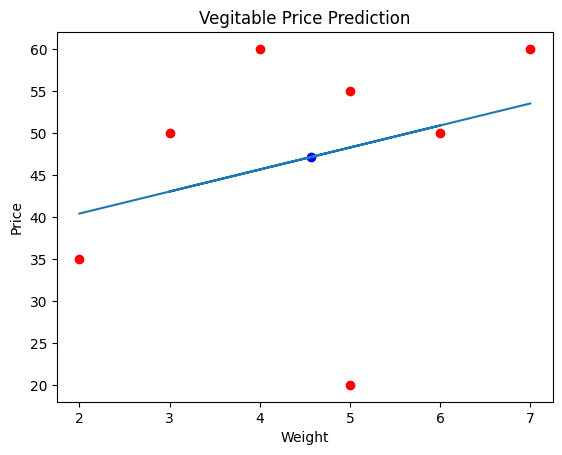

In [49]:
plt.scatter(df['Weight'],df['Price'],color='red')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Vegitable Price Prediction')
plt.plot(x,df['predicted_Price'])
plt.scatter(np.mean(x),np.mean(y),color="blue")